# Problem Statement:
Iris Flowers Classification Project
In this project, we will be working on Iris dataset to classify the flowers species, we will follow the whole machine learning project lifecycle and also we will deploy it using flask. Below is the whole outline that we will be following.

In [1]:
# install the dependencies

import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings 
warnings.filterwarnings('ignore') 

C:\Users\ramiu\AppData\Local\Temp\ipykernel_20400\1545165178.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(r"C:\Users\ramiu\Desktop\N N\IrisFlowerClassification\IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# to display stats about data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display no. of samples on each class
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preproces The Dataset

In [8]:
# check for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<Axes: >

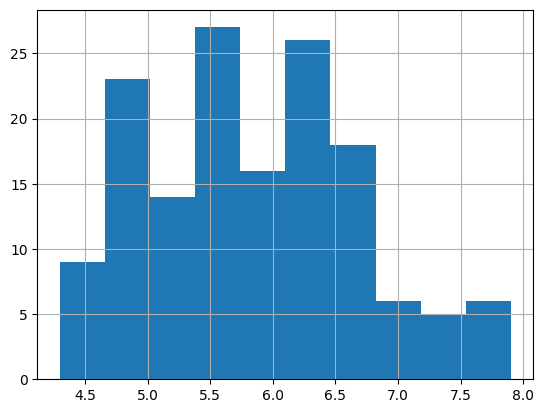

In [9]:
# histograms
data['sepal_length'].hist()

<Axes: >

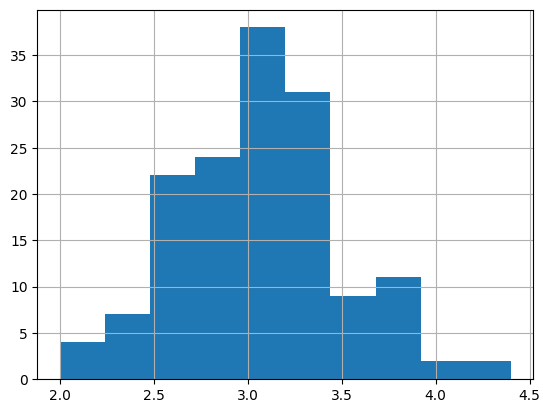

In [10]:
data['sepal_width'].hist()

<Axes: >

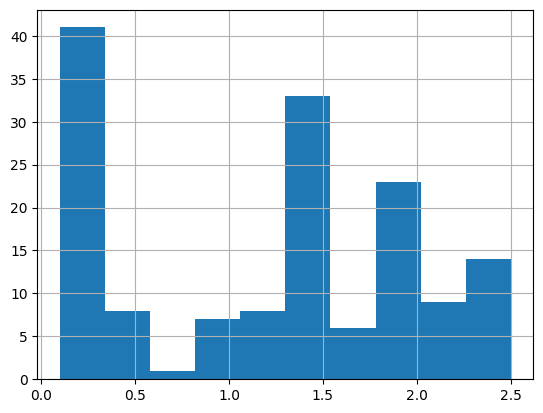

In [11]:
data['petal_width'].hist()

<Axes: >

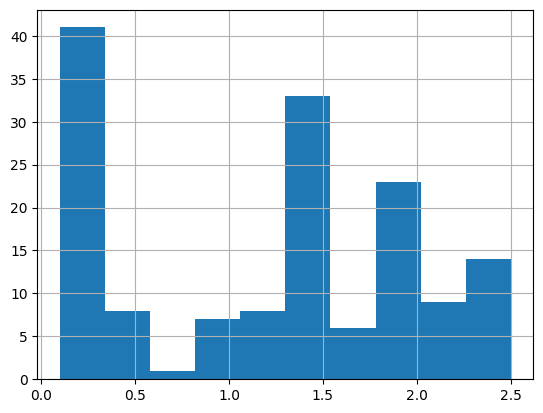

In [12]:
data['petal_width'].hist()

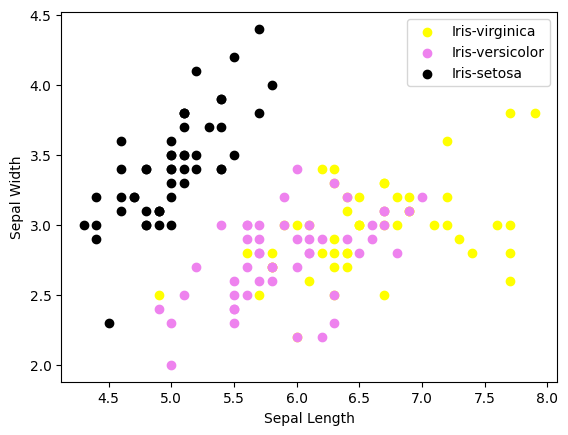

In [13]:
# scatterplot
colors = ['yellow', 'violet', 'black']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

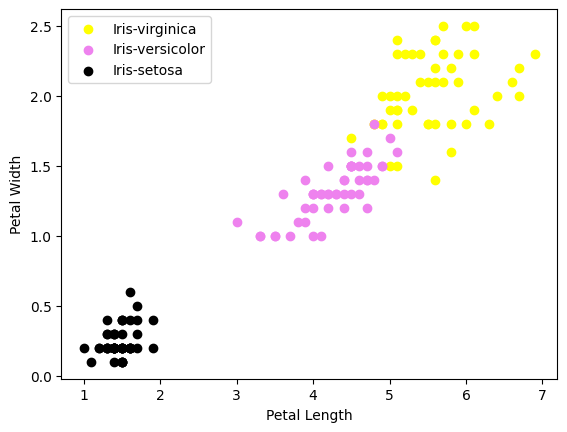

In [14]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [15]:
# lable encoder 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['species'] = le.fit_transform(data['species'])
data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Finding Correlation

In [16]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


# Change Feature and Labels

In [17]:
x=data.drop('species',axis=1)
y=data['species']

# Data Divided Into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [19]:
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=2, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [22]:
def model_score(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30) 

In [23]:
model_score(models, x_train, y_train)

Logistic_Regression :
0.9761904761904763
0.975609756097561
0.975
******************************
SVC :
0.9761904761904763
0.975609756097561
0.975
******************************
DecisionTreeClassifier :
0.9522313010685104
0.9508025849489264
0.95
******************************
GradientBoostingClassifier :
0.983739837398374
0.983739837398374
0.9833333333333333
******************************


# Hyper Parameter Tuning 

In [24]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree


dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
}

# Use Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use cross-validation to evaluate the model with the best hyperparameters
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

# Use the best model to make predictions
best_dt_classifier = grid_search.best_estimator_
dt_predictions = best_dt_classifier.predict(x_test)

# Evaluate the model with the best hyperparameters on the test set
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy with Best Hyperparameters:", accuracy)
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Cross-Validation Scores: [1.         1.         0.83333333 1.         0.95833333]
Mean Cross-Validation Accuracy: 0.9583333333333334
Accuracy with Best Hyperparameters: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Ploting The Decison Tree

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

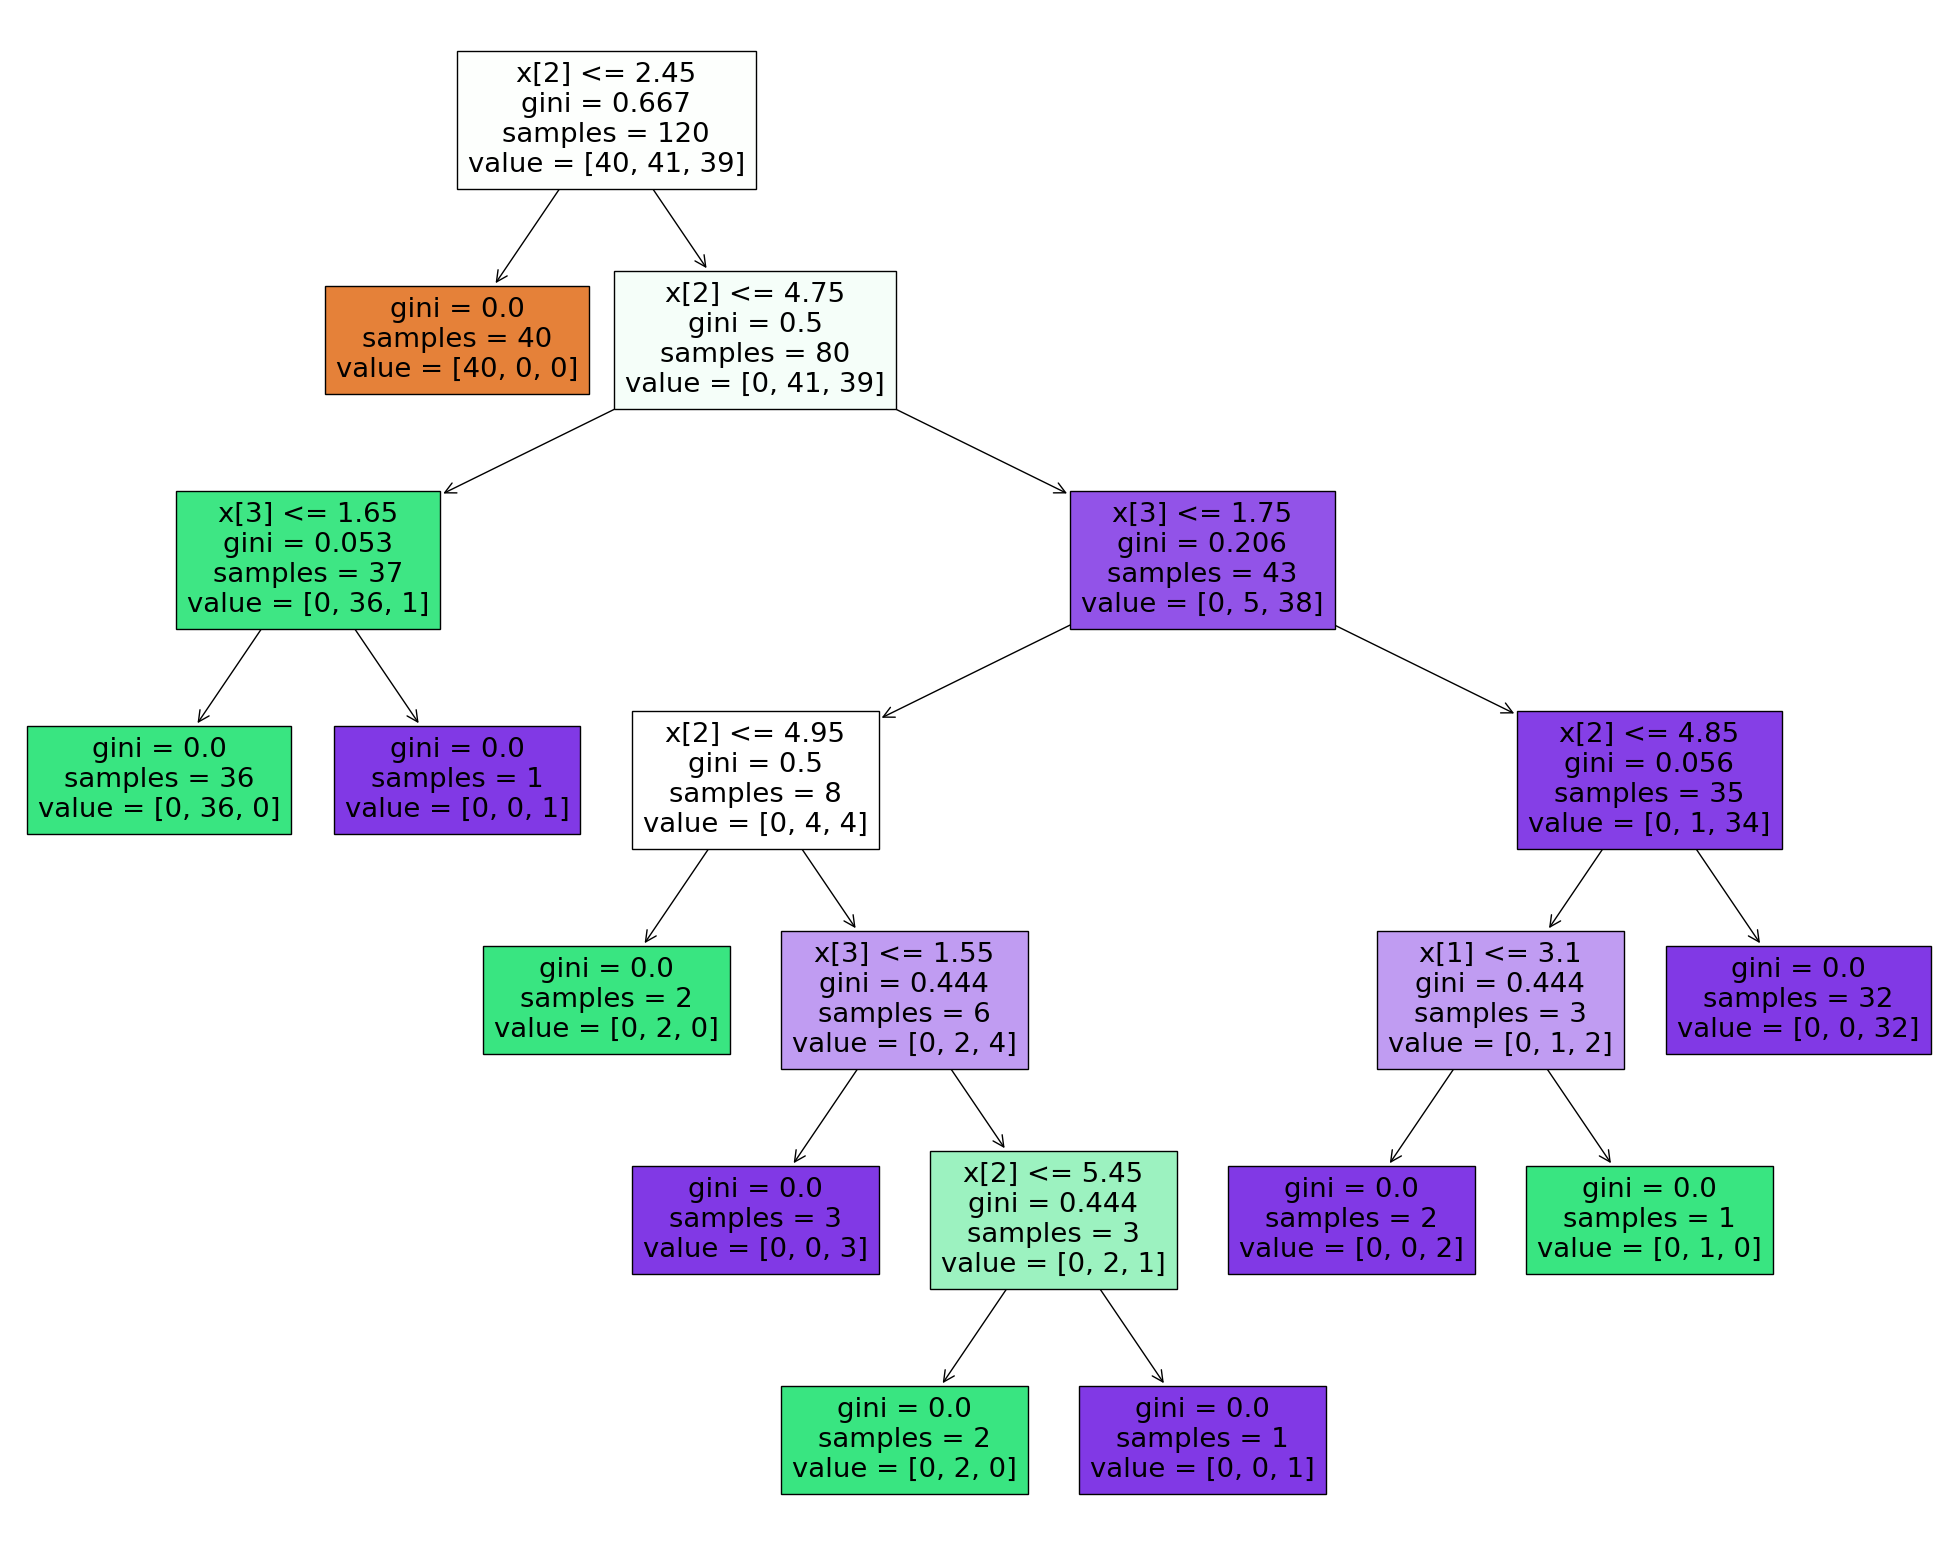

In [25]:
import matplotlib.pyplot as plt
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)



# Ploting The Decision Tree Using Best Paramters 

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

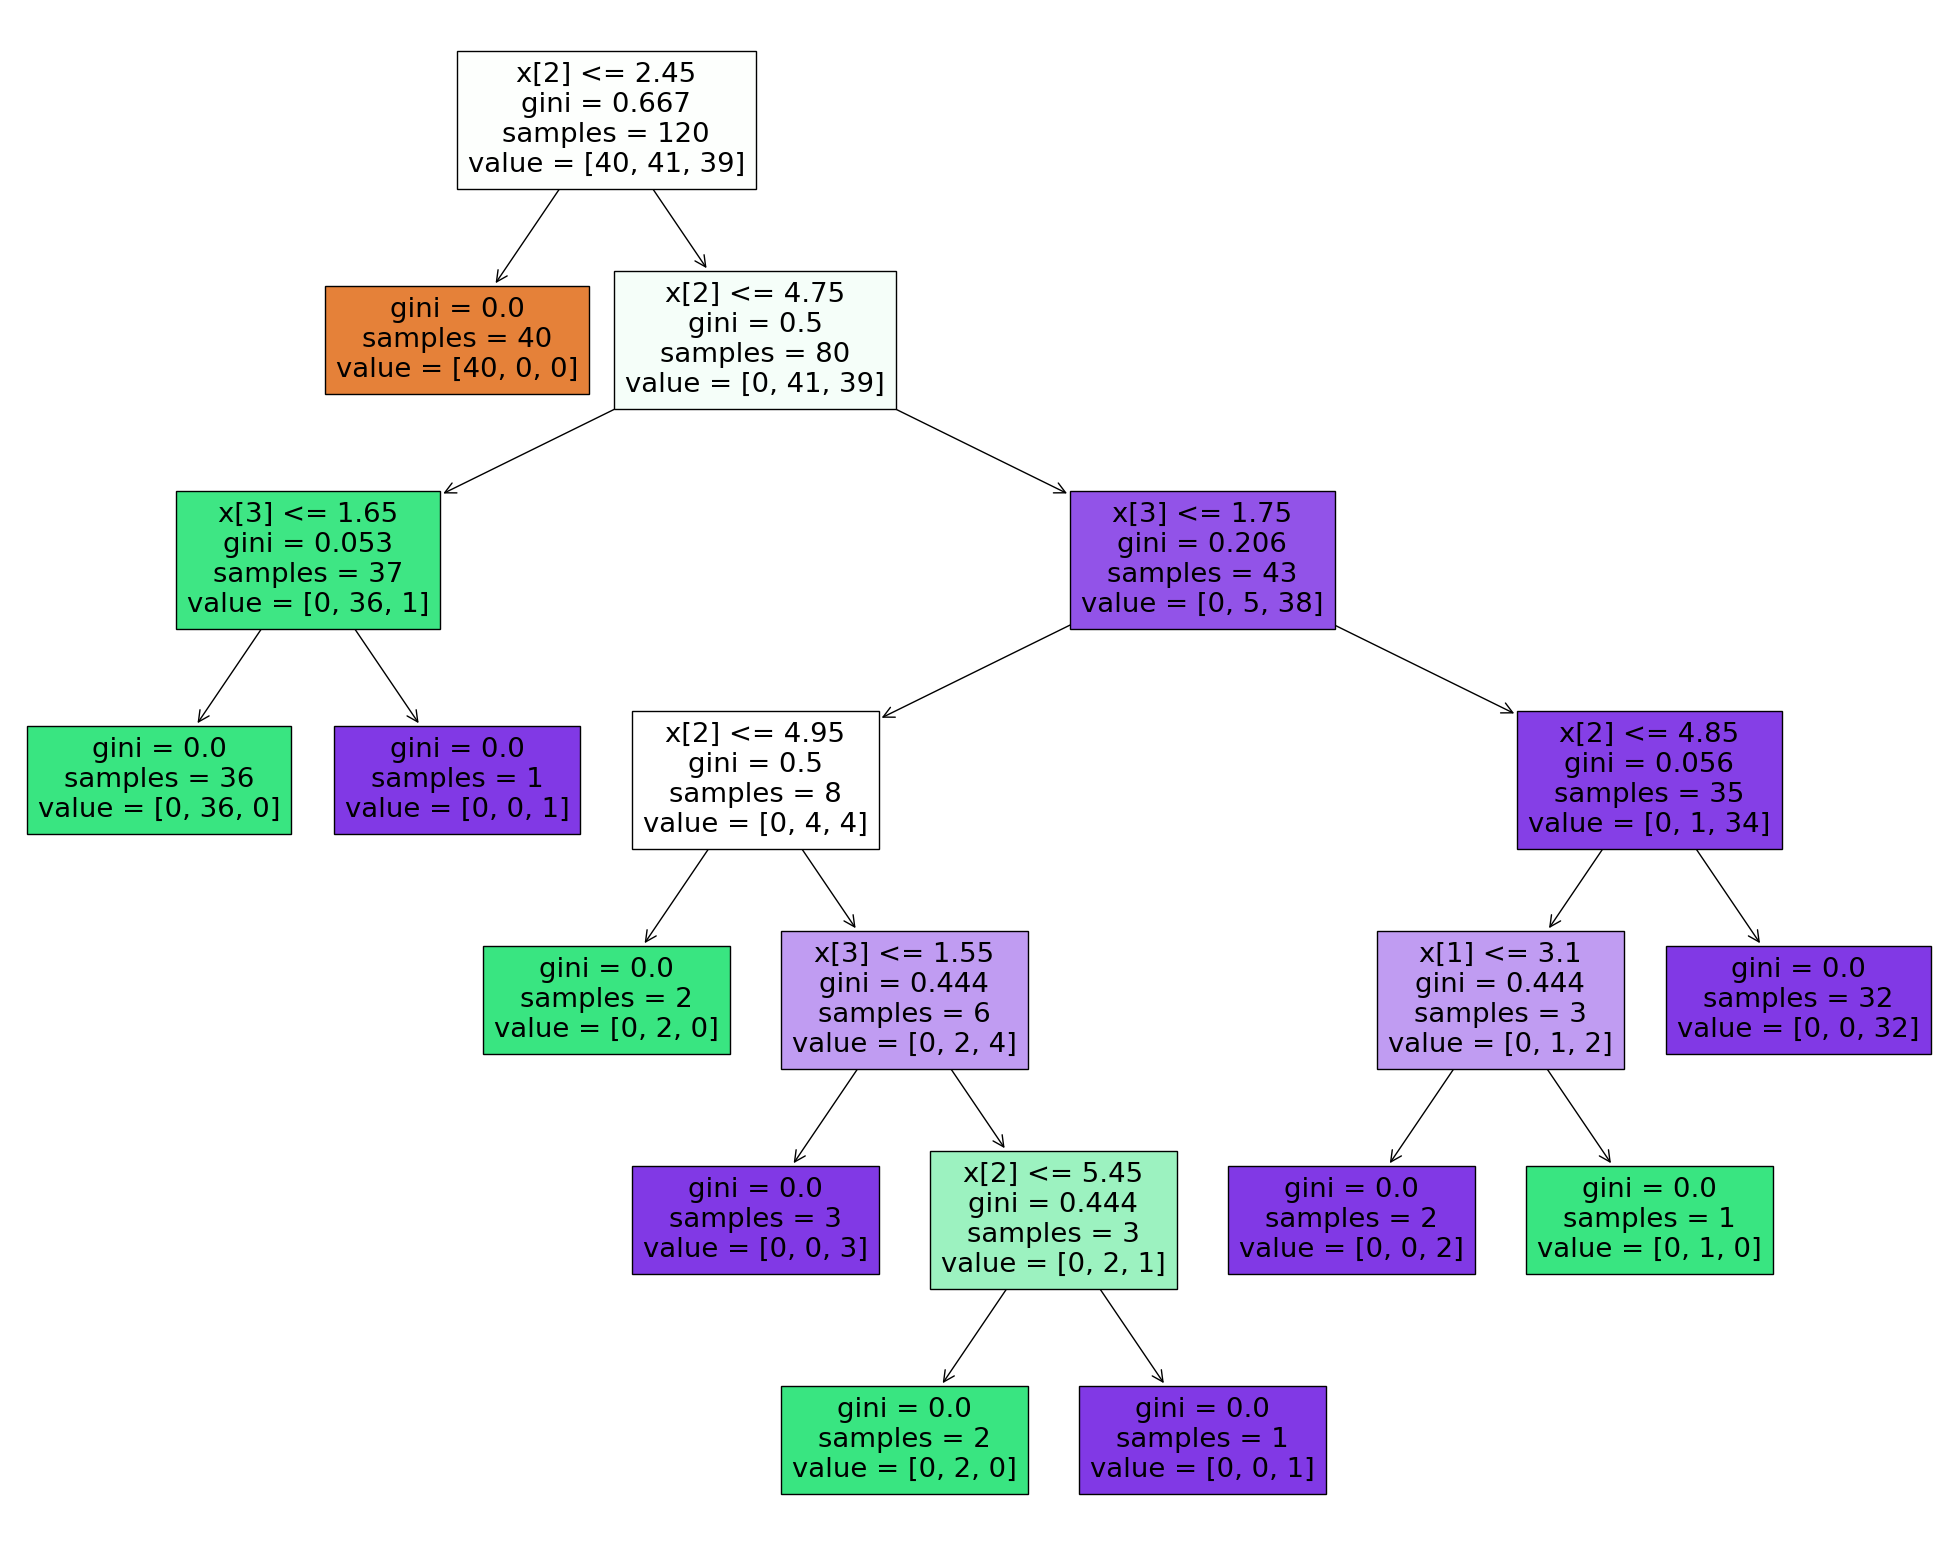

In [26]:
model2=DecisionTreeClassifier(max_depth=5,min_samples_leaf= 3, min_samples_split= 2)# 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2
model2.fit(x_train,y_train)

plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)



In [27]:
import pickle 
pickle.dump(model,open("trained_model.pkl","wb"))